# Proyecto individual: Sistema de recomendación de películas
​
Este proyecto constará de dos fases: `Ingenieria de datos`, `Modelamiento y evaluación con machine learning`.

### 1. Ingeniería de datos
* Esto incluye la limpieza y transformación de los datos, abordando problemas como:
    * valores faltantes, 
    * datos duplicados y variables irrelevantes,
    * valores anidados,
    * formateo de columnas,
    * nubes de palabras para ver las más frecuentes.
    * a fin de mejorar la calidad del dataset para el modelado.
    * análisis univariado.
    * análisis bivariado y multivariado.
​
### 2. Modelamiento y evaluación con machine learning
* Implementar un modelo de clasificación con aprendizaje supervisado que permita clasificar (**con un algoritmo de coseno de similitud, por ejemplo**) las películas por ... para encontrar una lista de 5 películas similares 

### 1. Análisis exploratorio de datos
* Esto incluye la exploración de los datos y análisis de patrones para posteriormente desarrollar el modelo de recomendación de películas:
    * relaciones entre variables.
    * matriz de correlación.
    * outliers o anomalías.
    * nubes de palabras.
    * análisis univariado.
    * análisis bivariado y multivariado.

#### 1.1. Importación de librerías

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Mostrar figuras de matplotlib en el entorno de Jupyter Notebook
%matplotlib inline

#### 1.2. Carga y visualización los datos

In [3]:
df_ml = pd.read_csv('dataset/data_movies_ml.csv')
df_ml.head(2)

,budget,overview,popularity,revenue,title,vote_average,vote_count,release_year,collection_name,studios_name,genres_name,return
0,30000000,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,Toy Story,7.7,5415.0,1995.0,Toy Story Collection,['Pixar Animation Studios'],"['Animation', 'Comedy', 'Family']",12.451801
1,65000000,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,Jumanji,6.9,2413.0,1995.0,Grumpy Old Men Collection,"['TriStar Pictures', 'Teitler Film', 'Intersco...","['Adventure', 'Fantasy', 'Family']",4.043035


#### 1.3. Descripción del DataFrame

In [4]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39901 entries, 0 to 39900
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           39901 non-null  int64  
 1   overview         23751 non-null  object 
 2   popularity       23802 non-null  float64
 3   revenue          39901 non-null  float64
 4   title            23802 non-null  object 
 5   vote_average     23802 non-null  float64
 6   vote_count       39901 non-null  float64
 7   release_year     39901 non-null  float64
 8   collection_name  2445 non-null   object 
 9   studios_name     24413 non-null  object 
 10  genres_name      34637 non-null  object 
 11  return           39901 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 3.7+ MB


1.3.1. Se observa que para realizar el modelo de machine learning, será necesario eliminar la variable collection_name dado que cuenta con pocos datos en relación con los demás. 

In [5]:
df_ml = df_ml.drop(['collection_name'], axis=1)

In [6]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39901 entries, 0 to 39900
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        39901 non-null  int64  
 1   overview      23751 non-null  object 
 2   popularity    23802 non-null  float64
 3   revenue       39901 non-null  float64
 4   title         23802 non-null  object 
 5   vote_average  23802 non-null  float64
 6   vote_count    39901 non-null  float64
 7   release_year  39901 non-null  float64
 8   studios_name  24413 non-null  object 
 9   genres_name   34637 non-null  object 
 10  return        39901 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 3.3+ MB


Se podria eliminar los nulos

In [7]:
df_ml = df_ml.dropna()

In [8]:
df_ml.isnull().sum()

budget          0
overview        0
popularity      0
revenue         0
title           0
vote_average    0
vote_count      0
release_year    0
studios_name    0
genres_name     0
return          0
dtype: int64

Se podria convertir a valores tipo float. No se si puede haber problemas con valores integer

In [9]:
df_ml.to_csv('dataset/data.csv', index=False)

#### 1.4. Visualización de los datos 

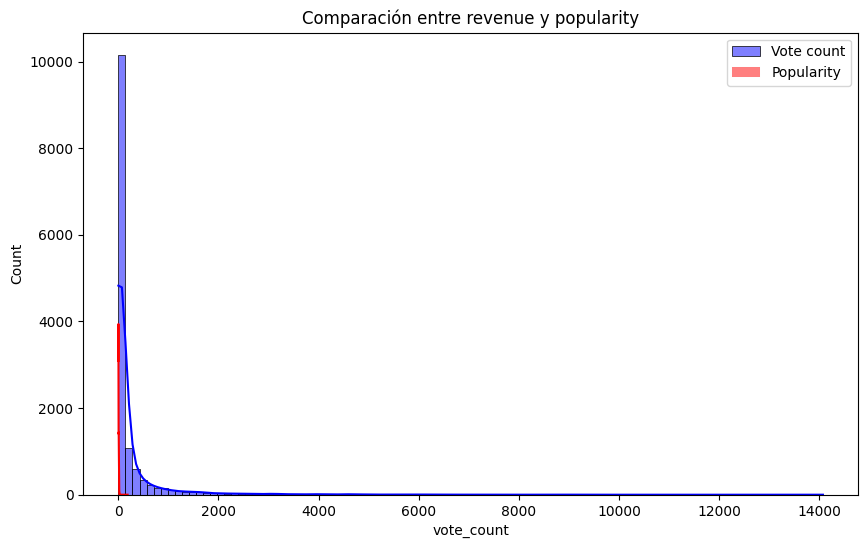

In [14]:
plt.figure(figsize=(10,6))

sns.histplot(data=df_ml, x='vote_count', bins=100, kde=True, color='blue', label='Vote count')

sns.histplot(data=df_ml, x='popularity', bins=100, kde=True, color='red', label='Popularity')

plt.title('Comparación entre revenue y popularity')
plt.legend()
plt.show()

## Algoritmo

In [22]:
!pip freeze

aiocron==1.8
annotated-types==0.7.0
anyio==4.6.2.post1
asttokens==2.4.1
certifi==2024.8.30
charset-normalizer==3.4.0
click==8.1.7
colorama==0.4.6
comm==0.2.2
contourpy==1.3.0
croniter==4.0.0
cycler==0.12.1
debugpy==1.8.7
decorator==5.1.1
executing==2.1.0
fastapi==0.115.3
fonttools==4.54.1
h11==0.14.0
idna==3.10
ipykernel==6.29.5
ipython==8.29.0
jedi==0.19.1
jupyter_client==8.6.3
jupyter_core==5.7.2
kiwisolver==1.4.7
matplotlib==3.9.2
matplotlib-inline==0.1.7
nest-asyncio==1.6.0
numpy==2.1.2
packaging==24.1
pandas==2.2.3
parso==0.8.4
pillow==11.0.0
platformdirs==4.3.6
prompt_toolkit==3.0.48
psutil==6.1.0
pure_eval==0.2.3
pydantic==2.9.2
pydantic_core==2.23.4
Pygments==2.18.0
pyparsing==3.2.0
python-dateutil==2.9.0.post0
pytz==2024.2
pywin32==308
pyzmq==26.2.0
requests==2.32.3
seaborn==0.13.2
six==1.16.0
sniffio==1.3.1
stack-data==0.6.3
starlette==0.41.0
tornado==6.4.1
traitlets==5.14.3
typing_extensions==4.12.2
tzdata==2024.2
tzlocal==5.2
urllib3==2.2.3
uvicorn==0.32.0
wcwidth==0.2.13


In [28]:
!pip freeze

aiocron==1.8
annotated-types==0.7.0
anyio==4.6.2.post1
asttokens==2.4.1
certifi==2024.8.30
charset-normalizer==3.4.0
click==8.1.7
colorama==0.4.6
comm==0.2.2
contourpy==1.3.0
croniter==4.0.0
cycler==0.12.1
debugpy==1.8.7
decorator==5.1.1
executing==2.1.0
fastapi==0.115.3
fonttools==4.54.1
h11==0.14.0
idna==3.10
ipykernel==6.29.5
ipython==8.29.0
jedi==0.19.1
jupyter_client==8.6.3
jupyter_core==5.7.2
kiwisolver==1.4.7
matplotlib==3.9.2
matplotlib-inline==0.1.7
nest-asyncio==1.6.0
numpy==2.1.2
packaging==24.1
pandas==2.2.3
parso==0.8.4
pillow==11.0.0
platformdirs==4.3.6
prompt_toolkit==3.0.48
psutil==6.1.0
pure_eval==0.2.3
pydantic==2.9.2
pydantic_core==2.23.4
Pygments==2.18.0
pyparsing==3.2.0
python-dateutil==2.9.0.post0
pytz==2024.2
pywin32==308
pyzmq==26.2.0
requests==2.32.3
seaborn==0.13.2
six==1.16.0
sniffio==1.3.1
stack-data==0.6.3
starlette==0.41.0
tornado==6.4.1
traitlets==5.14.3
typing_extensions==4.12.2
tzdata==2024.2
tzlocal==5.2
urllib3==2.2.3
uvicorn==0.32.0
wcwidth==0.2.13


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Primero, vamos a convertir la columna 'genres_name' a una representación numérica usando TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_ml['genres_name'])

# Luego, vamos a añadir las columnas numéricas a nuestra matriz de características
features = np.column_stack([tfidf_matrix.toarray(), df_ml['revenue'], df_ml['popularity'], df_ml['vote_count'], df_ml['vote_average']])

ImportError: DLL load failed while importing _fblas: No se puede encontrar el módulo especificado.

In [ ]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2) # producto puntoel 
    norm_product = np.linalg.norm(vec1) * np.linalg.norm(vec2)
    return dot_product / norm_product

In [ ]:
vector1 = np.array([1,2,4])
vector2 = np.array([2,3,4])

similarity = cosine_similarity(vector1, vector2)
similarity

np.float64(0.9725290781677294)

https://www.youtube.com/watch?v=7nago29IlxM